pval= 1.0011831158334636e-57
r_va;= -0.9407451549279848
0.7054111908955418


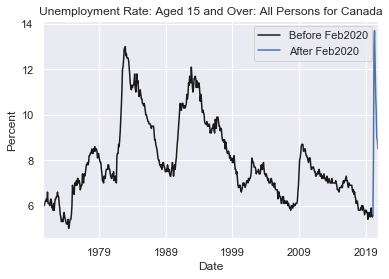

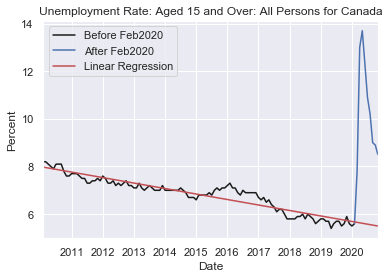

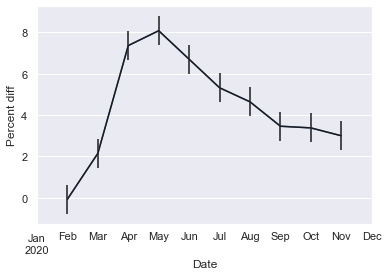

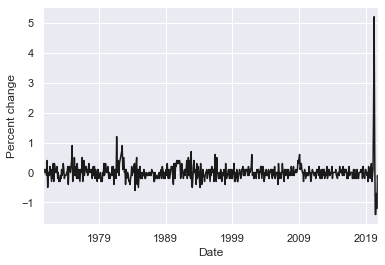

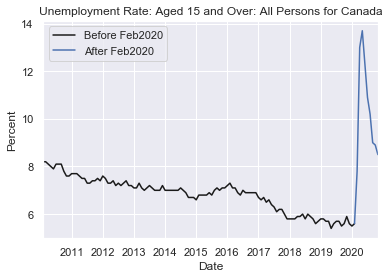

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns

def droite(x,a,b):
    y=a*x+b
    return y 

url='https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRUNTTTTCAM156S&scale=left&cosd=1970-08-29&coed=2020-11-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-12-19&revision_date=2020-12-19&nd=1960-01-01'

#reading the data
df = pd.read_csv(url, index_col='DATE', parse_dates=True)
#renaming the column
df.columns=['Un_rate']

#important dates for the graphs and line reg
start_date = '01-01-2010'
start_date2 = '01-01-1960'
end_date = '02-01-2020'
#--------------------------------------------
#Jan 2010 to  feb 2020
bfC19=df.loc[(df.index>start_date)&(df.index<=end_date)]

#After Jan 2020
afC19S=df.loc[(df.index>=end_date)]

#from 1960 to Jan 2020
df1=df.loc[(df.index>start_date2)&(df.index<=end_date)]

#For the lin-reg
Lin_reg=df.loc[(df.index>start_date)]

#the line reg does not work with dates 
x=np.arange(len(bfC19))

#linear regression 
slope, intercept, r_value, p_value, std_err = stats.linregress(x, bfC19.Un_rate.values)
print('pval=',p_value)
print('r_va;=',r_value)
#Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is
# zero, using Wald Test with t-distribution of the test statistic.



# x values for the linear regression 
xr=np.arange(len(Lin_reg))
Lin_reg.Un_rate=droite(xr,slope,intercept)

#########################################################################################


#########################################################################################

#Renaming the columns for the graph's legend
Lin_reg.columns=['Linear Regression']
bfC19.columns=['Before Feb2020']
afC19S.columns=['After Feb2020']
df1.columns=['Before Feb2020']
#--------------------------------------------

# ---------for the error bars--------------
#getting an array of the b4COVID-19
y1=bfC19['Before Feb2020'].values
#Linear regression but only for b4COVID-19
y2=droite(np.arange(len(bfC19)),slope,intercept)
err=np.abs((y2-y1)).max()
print(err)
#--------------------------------------------


a=afC19S.join(Lin_reg)
a['diff']=a['After Feb2020']-a['Linear Regression']

#dates for the x axis limits
x1=pd.to_datetime('01-30-2020')
x2=pd.to_datetime('12-10-2020')


df=df.reset_index()
p1=df['Un_rate'].iloc[:-1]
p2=df['Un_rate'].iloc[1:]

var=((p2.values-p1.values))
per_change=pd.DataFrame( index=df['DATE'].iloc[1:])
per_change['per']=var




#Graphs

#seaborn style graphs
sns.set_theme()


fig1, ax1 =plt.subplots()
df1.plot(ax=ax1,color='k')
afC19S.plot(ax=ax1,color='b')
ax1.set_ylabel('Percent')
ax1.set_xlabel('Date')
ax1.set_title('Unemployment Rate: Aged 15 and Over: All Persons for Canada')
ax1.legend(loc='best')
fig1.savefig('fig1')


fig2, ax2 =plt.subplots()
bfC19.plot(ax=ax2,color='k')
afC19S.plot(ax=ax2,color='b')
Lin_reg.plot(ax=ax2,color='r')
ax2.set_ylabel('Percent')
ax2.set_xlabel('Date')
ax2.set_title('Unemployment Rate: Aged 15 and Over: All Persons for Canada')
fig2.savefig('fig2')


fig3, ax3 =plt.subplots()
a['diff'].plot(ax=ax3)
ax3.errorbar(a.index, a['diff'], yerr=err,c='k')
ax3.set_ylabel('Percent diff')
ax3.set_xlabel('Date')
ax3.set_xlim(x1,x2)
fig3.savefig('fig3')





fig4, ax4 =plt.subplots()
per_change.plot(ax=ax4,color='k',legend=False)
ax4.set_ylabel('Percent change')
ax4.set_xlabel('Date')
fig4.savefig('fig4')


fig5, ax5 =plt.subplots()
bfC19.plot(ax=ax5,color='k')
afC19S.plot(ax=ax5,color='b')
ax5.set_ylabel('Percent')
ax5.set_xlabel('Date')
ax5.set_title('Unemployment Rate: Aged 15 and Over: All Persons for Canada')
fig5.savefig('fig5')


plt.show()